# AUE Data Analyzation
## Contains:
- Avg time for process time as Line Graph 
- Avg UEQ responses as Violin Plot

In [56]:
import pandas as pd
import glob

In [57]:
# Extract and combine all response csv's
path = '.' # use your path
all_files = glob.glob(path + "/*_responses.csv")

li = []
for filename in all_files:
  df = pd.read_csv(filename, index_col = None, header = 0)
  li.append(df)

df_allData = pd.concat(li, axis=0, ignore_index = True)
# display(df_allData)

In [58]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np


Avg Time for each run:


Google 1     22.1290
Google 2     19.7505
Google 3     19.7895
3D Auth 1    25.7445
3D Auth 2    25.1785
3D Auth 3    21.5120
dtype: float64

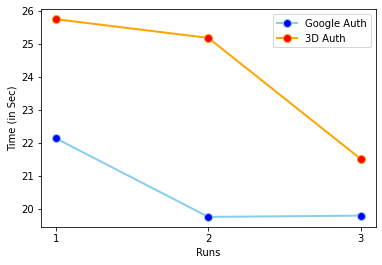

In [59]:
# Avg Times for each run
df_time = pd.read_csv("zeitmessung.csv", index_col = None, header = 0)
avg_column = df_time.iloc[:, 1:7].mean(axis=0)
print("Avg Time for each run:")
display(avg_column)

avg_google = df_time.iloc[:, 1:4].mean(axis=0)
avg_3d = df_time.iloc[:, 4:7].mean(axis=0)

# Line Graph for each run
plt.plot([1, 2, 3], avg_google, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2)
plt.plot([1, 2, 3], avg_3d, marker='o', markerfacecolor='red', markersize=8, color='orange', linewidth=2)
plt.legend(["Google Auth", "3D Auth"])
plt.xlabel("Runs")
plt.ylabel("Time (in Sec)")
plt.locator_params(axis="x", integer=True)


{'bodies': [<matplotlib.collections.PolyCollection at 0x2161163faf0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2161163fa00>,
 'cmins': <matplotlib.collections.LineCollection at 0x216116975b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x21611697d90>}

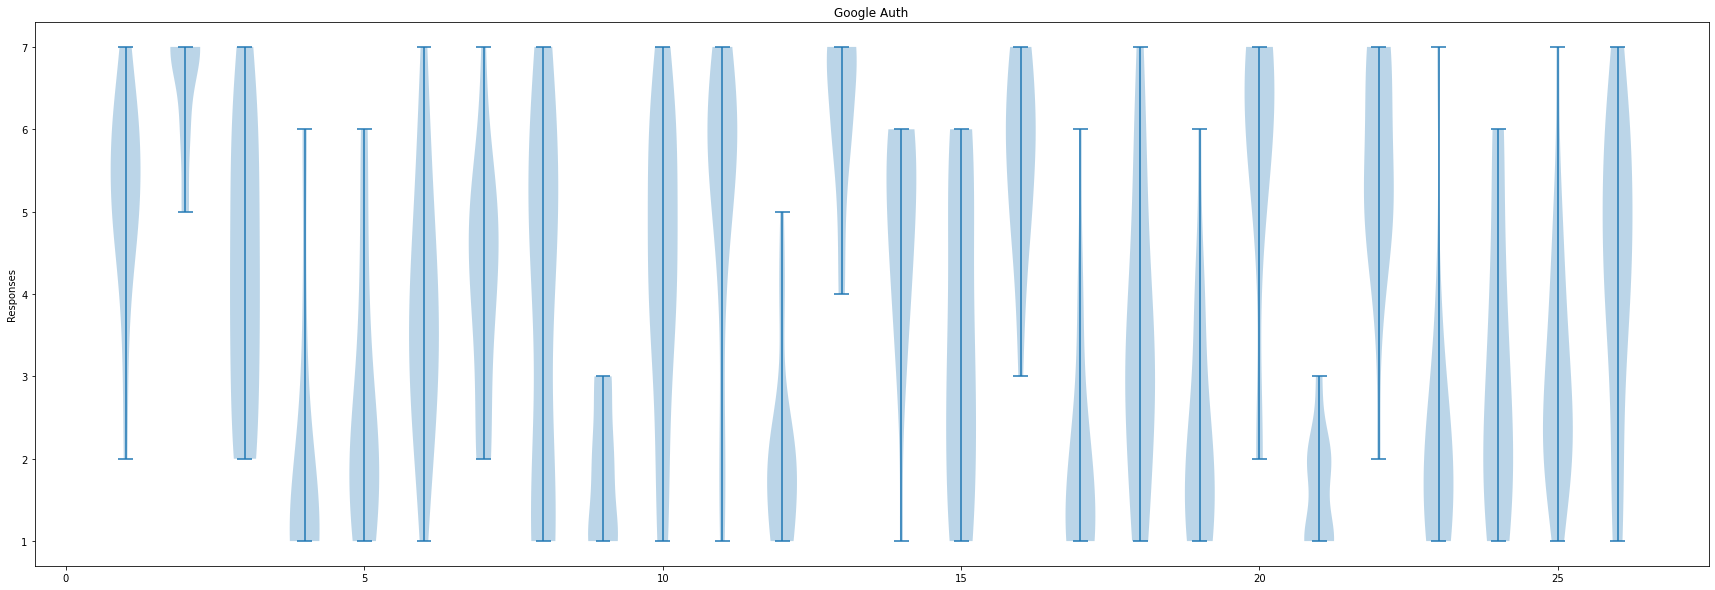

In [60]:
# Violin Graph Google Auth
fig, (ax1) = plt.subplots(figsize=(30, 10))
df_google = df_allData[df_allData['Method'] == "Google Auth"].loc[:, str(1): str(26)].values

ax1.set_title('Google Auth')
ax1.set_ylabel('Responses')
ax1.violinplot(df_google)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2161009b3a0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2161009ba60>,
 'cmins': <matplotlib.collections.LineCollection at 0x2161001ef40>,
 'cbars': <matplotlib.collections.LineCollection at 0x2161001e4f0>}

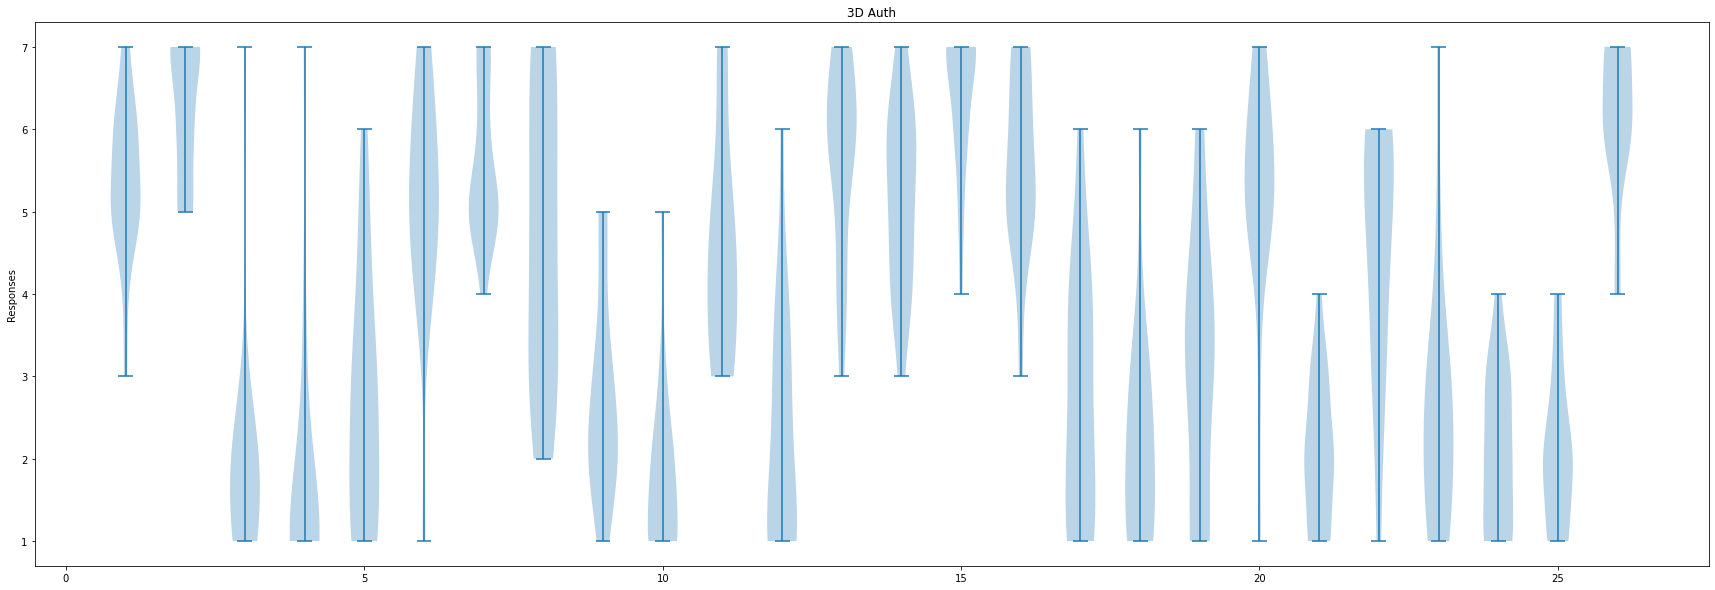

In [61]:
# Violin Graph §D Auth
fig, (ax2) = plt.subplots(figsize=(30, 10))
df_3d = df_allData[df_allData['Method'] == "3D Auth"].loc[:, str(1): str(26)].values

ax2.set_title('3D Auth')
ax2.set_ylabel('Responses')
ax2.violinplot(df_3d)